In [21]:
import sunpy
import sunpy.map
import numpy as np
from sunpy.map import make_fitswcs_header
from scipy.io import readsav
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.units import Quantity
from astropy.visualization import ImageNormalize, AsinhStretch
import matplotlib.pyplot as plt
import cmcrameri.cm as cmcm
from fancy_colorbar import plot_colorbar

In [4]:
ucomp_bpos = readsav("../../src/UCoMP/20221020/ucomp_new_maps_20221020.sav", verbose=True)

--------------------------------------------------
Date: Tue Dec 12 17:15:27 2023
User: zihao
Host: Zihaos-MacBook-Pro.local
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.5
--------------------------------------------------
Successfully read 8 records of which:
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 5 are of type VARIABLE
--------------------------------------------------
Available variables:
 - b_pos [<class 'numpy.ndarray'>]
 - vph [<class 'numpy.ndarray'>]
 - density [<class 'numpy.ndarray'>]
 - wave_angle [<class 'numpy.ndarray'>]
 - angle_error [<class 'numpy.ndarray'>]
--------------------------------------------------


In [5]:
ucomp_bpos["b_pos"].shape

(1024, 1280)

In [9]:
ucomp_header = make_fitswcs_header(ucomp_bpos["b_pos"].shape, 
                                   coordinate=SkyCoord(0*u.arcsec, 0*u.arcsec, frame="helioprojective", obstime="2022-10-20T20:30:00"),
                                   scale=Quantity([2.944, 2.944]*u.arcsec/u.pix),
                                   instrument="UCoMP",
                                   telescope="20cm One Shot",
                                   observatory="MLSO")

In [26]:
ucomp_bpos_copy = ucomp_bpos["b_pos"].copy()
ucomp_bpos_copy[ucomp_bpos_copy < 0] = 0
ucomp_bpos_copy[ucomp_bpos_copy > 1e3] = 0
ucomp_bpos_copy[np.isnan(ucomp_bpos_copy)] = 0


In [27]:
ucomp_bpos_map = sunpy.map.Map(ucomp_bpos_copy, ucomp_header)

/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/sunpy/map/mapbase.py:656: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate


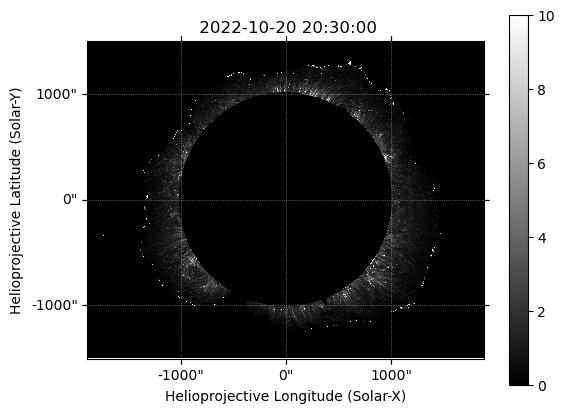

In [28]:
ucomp_bpos_map.peek(vmin=0,vmax=10)

/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/sunpy/map/mapbase.py:656: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate


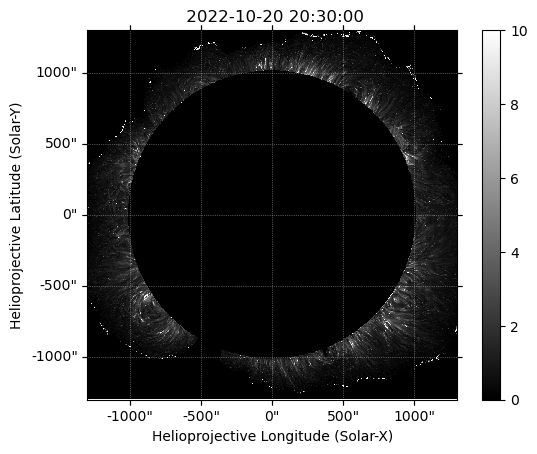

In [29]:
ucomp_bpos_map_crop = ucomp_bpos_map.submap(SkyCoord(-1300*u.arcsec, -1300*u.arcsec, frame=ucomp_bpos_map.coordinate_frame),
                                            top_right=SkyCoord(1300*u.arcsec, 1300*u.arcsec, frame=ucomp_bpos_map.coordinate_frame))
ucomp_bpos_map_crop.peek(vmin=0,vmax=10)

/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/sunpy/map/mapbase.py:656: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hgln_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crlt_obs,crln_obs

  obs_coord = self.observer_coordinate


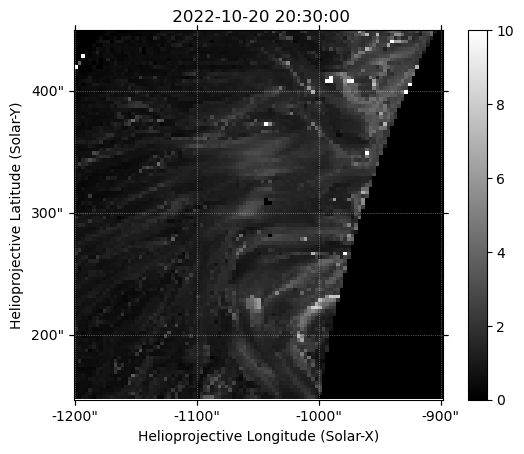

In [30]:
ucomp_bpos_map_zoomin = ucomp_bpos_map.submap(SkyCoord(-1200*u.arcsec, 150*u.arcsec, frame=ucomp_bpos_map.coordinate_frame),
                                            top_right=SkyCoord(-900*u.arcsec, 450*u.arcsec, frame=ucomp_bpos_map.coordinate_frame))
ucomp_bpos_map_zoomin.peek(vmin=0,vmax=10)

/home/yjzhu/anaconda3/envs/sunpy/lib/python3.12/site-packages/astropy/visualization/wcsaxes/patches.py:196: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  super().__init__(vertices, **kwargs)


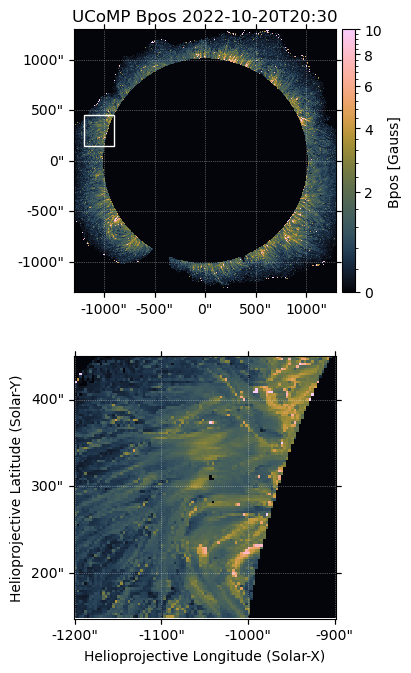

In [46]:
fig = plt.figure(layout="constrained", figsize=(4,6.8))
ax1 = fig.add_subplot(211, projection=ucomp_bpos_map_crop)
im1 = ucomp_bpos_map_crop.plot(axes=ax1, cmap=cmcm.batlowK, 
                         norm=ImageNormalize(vmin=0, vmax=10, stretch=AsinhStretch(0.2)),
                         title="UCoMP Bpos 2022-10-20T20:30")

ax1.coords[0].set_axislabel("")
ax1.coords[1].set_axislabel("")
ax1.coords[0].axislabels.set_visible(False)
ax1.coords[1].axislabels.set_visible(False)

clb1, clb_ax1 = plot_colorbar(im1, ax1, bbox_to_anchor=[1.02, 0 , 0.05, 1], )
clb_ax1.set_ylabel("Bpos [Gauss]")

ax2 = fig.add_subplot(212, projection=ucomp_bpos_map_zoomin)
ucomp_bpos_map_zoomin.plot(axes=ax2, cmap=cmcm.batlowK, 
                           norm=ImageNormalize(vmin=0, vmax=10, stretch=AsinhStretch(0.2)),
                           title=None)

ucomp_bpos_map_crop.draw_quadrangle(SkyCoord(-1200*u.arcsec, 150*u.arcsec, frame=ucomp_bpos_map.coordinate_frame),
                                    top_right=SkyCoord(-900*u.arcsec, 450*u.arcsec, frame=ucomp_bpos_map.coordinate_frame),
                                    axes=ax1, color="white", lw=1)